In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [8]:
vix_data = pd.read_excel("vix_data.xlsx")
filtered_Data = vix_data.loc[8:][[1,2,3,4,5,6,7,8,9,10]]

In [10]:
date_time = filtered_Data[1]

In [11]:
date_time_index = pd.DatetimeIndex(date_time)

In [12]:
converted_Data = np.array(vix_data.loc[8:][[2,3,4,5,6,7,8,9,10]]).astype(float)

In [13]:
vix_updated_Data = pd.DataFrame(converted_Data, columns=["UVXY","SPY","VXXBEN","VIX", "UX1", "UX2", "UX3","UX4", "Day OF Week"], index= date_time_index)

In [16]:
vix_updated_Data.index.names = ["Date"]

In [18]:
vix_updated_Data["Day OF Week"] = vix_updated_Data["Day OF Week"].astype(int)

In [20]:
vix_updated_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 9 columns):
UVXY           3246 non-null float64
SPY            3246 non-null float64
VXXBEN         3246 non-null float64
VIX            3246 non-null float64
UX1            3246 non-null float64
UX2            3246 non-null float64
UX3            3246 non-null float64
UX4            3246 non-null float64
Day OF Week    3246 non-null int64
dtypes: float64(8), int64(1)
memory usage: 253.6 KB


In [21]:
filtered_Data = vix_updated_Data

### lets plot eact column to make some comparison so the data set

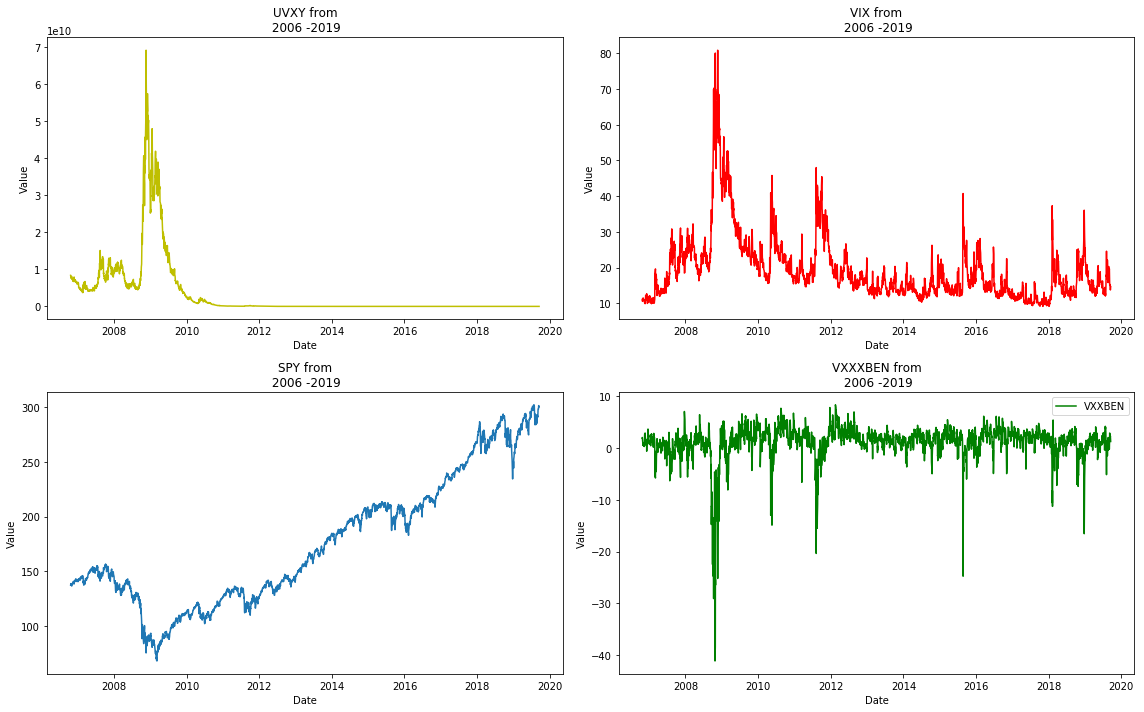

In [22]:
fig, axes = plt.subplots(2,2, figsize = (16,10))
axes[0,0].plot(filtered_Data["UVXY"], color = "y", label = "UVXY")
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Value")
axes[0,0].set_title("UVXY from\n 2006 -2019")
axes[0,1].plot(filtered_Data["VIX"], color = "r", label = "VIX")
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("Value")
axes[0,1].set_title("VIX from\n 2006 -2019")
axes[1,1].plot(filtered_Data["VXXBEN"], color = "g", label = "VXXBEN")
axes[1,1].set_xlabel("Date")
axes[1,1].set_ylabel("Value")
axes[1,1].set_title("VXXXBEN from\n 2006 -2019")
axes[1,0].plot(filtered_Data["SPY"], label = "SPY")
axes[1,0].set_xlabel("Date")
axes[1,0].set_ylabel("Value")
axes[1,0].set_title("SPY from\n 2006 -2019")
plt.tight_layout()
plt.legend();

# WE will evaluate each of the securties above individually and follw with any coorelation between them. 

### Lets plot uvxy and seethe changes over the time frame

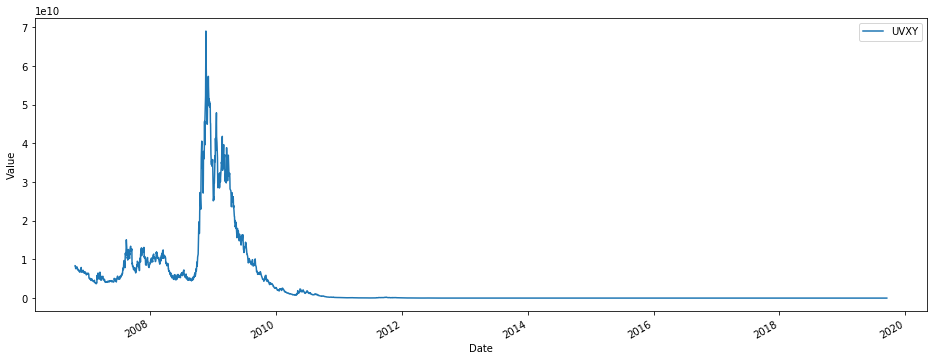

In [23]:
filtered_Data["UVXY"].plot(figsize = (16,6), label = "UVXY")
plt.ylabel("Value")
plt.legend()

### What was the highest value of UVXY and what date.

## Highs

In [24]:
filtered_Data["UVXY"].max()

69072366961.0

In [25]:
filtered_Data["UVXY"].astype(float).idxmax()

Timestamp('2008-11-20 00:00:00')

In [84]:
filtered_Data.loc["2008-11-20"]

UVXY                  6.907237e+10
SPY                   7.545000e+01
VXXBEN               -2.517500e+01
VIX                   8.086000e+01
UX1                   6.623000e+01
UX2                   5.977000e+01
UX3                   5.467000e+01
UX4                   5.058000e+01
Day OF Week           4.000000e+00
UVXY Daily Changes    1.057043e-01
UVXY Daily Return     8.245410e+00
VIX Daily Changes     8.887692e-02
VIX Daily Returns     7.297834e+00
VXXBEN daily          2.552979e-01
SPY Daily Changes    -7.423313e-02
Name: 2008-11-20 00:00:00, dtype: float64

## Lows

In [85]:
filtered_Data["UVXY"].min()

23.63

In [86]:
filtered_Data["UVXY"].idxmin()

Timestamp('2019-07-24 00:00:00')

In [87]:
filtered_Data.loc["2019-07-24"]

UVXY                  2.363000e+01
SPY                   3.014400e+02
VXXBEN                4.182500e+00
VIX                   1.207000e+01
UX1                   1.437500e+01
UX2                   1.582500e+01
UX3                   1.622500e+01
UX4                   1.637500e+01
Day OF Week           3.000000e+00
UVXY Daily Changes   -3.904026e-02
UVXY Daily Return     2.820796e-09
VIX Daily Changes    -4.282316e-02
VIX Daily Returns     1.089350e+00
VXXBEN daily          6.628426e-02
SPY Daily Changes     4.699530e-03
Name: 2019-07-24 00:00:00, dtype: float64

### Lets check the daily changes of UVXY over the time frame

In [88]:
uvxy_DailyChanges = filtered_Data["UVXY"].pct_change()

In [89]:
filtered_Data["UVXY Daily Changes"] = uvxy_DailyChanges

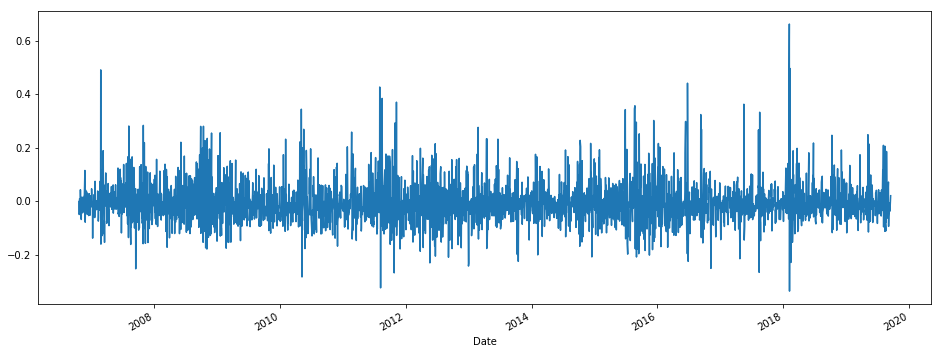

In [91]:
filtered_Data["UVXY Daily Changes"].plot(figsize = (16,6));

### Looks like there was a big change in UVXY early 2018. What was the exact date and why did this occurr

## Highs

In [29]:
filtered_Data["UVXY Daily Changes"].max()

0.6620639534883721

In [30]:
filtered_Data["UVXY Daily Changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [31]:
filtered_Data.loc["2018-02-05"]

UVXY                  114.350000
SPY                   263.930000
VXXBEN                 -8.767500
VIX                    37.320000
UX1                    33.225000
UX2                    27.975000
UX3                    24.725000
UX4                    20.950000
Day OF Week             1.000000
UVXY Daily Changes      0.662064
Name: 2018-02-05 00:00:00, dtype: float64

### Lows

In [92]:
filtered_Data["UVXY Daily Changes"].min()

-0.3344993441189331

In [93]:
filtered_Data["UVXY Daily Changes"].idxmin()

Timestamp('2018-02-06 00:00:00')

In [94]:
filtered_Data.loc["2018-02-06"]

UVXY                  7.610000e+01
SPY                   2.691300e+02
VXXBEN               -1.058250e+01
VIX                   2.998000e+01
UX1                   2.387500e+01
UX2                   2.102500e+01
UX3                   2.000000e+01
UX4                   1.922500e+01
Day OF Week           2.000000e+00
UVXY Daily Changes   -3.344993e-01
UVXY Daily Return     9.084323e-09
VIX Daily Changes    -1.966774e-01
VIX Daily Returns     2.705776e+00
VXXBEN daily          2.070145e-01
SPY Daily Changes     1.970219e-02
Name: 2018-02-06 00:00:00, dtype: float64

### Lets check the rolling average of UVXY over the peroid 

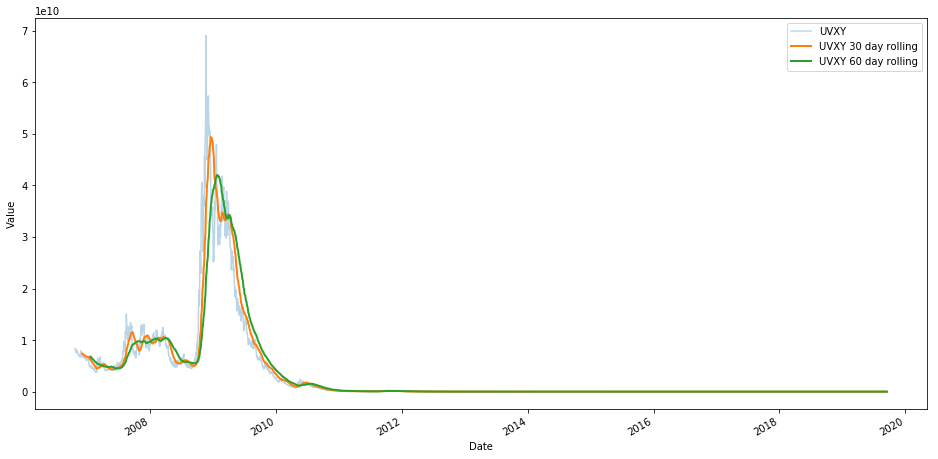

In [95]:
filtered_Data["UVXY"].plot(figsize = (16,8), label = "UVXY", alpha = 0.3)
filtered_Data.rolling(30).mean()["UVXY"].plot(label = "UVXY 30 day rolling", lw = 2)
filtered_Data.rolling(60).mean()["UVXY"].plot(label = "UVXY 60 day rolling", lw = 2)
plt.ylabel("Value")
plt.legend();

### we will calculate the returns from UVXY over the period if we were to buy on the first day in the data set

In [96]:
filtered_Data["UVXY Daily Return"] = (1 + filtered_Data["UVXY Daily Changes"]).cumprod()

In [97]:
filtered_Data.head(10)

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day OF Week,UVXY Daily Changes,UVXY Daily Return,VIX Daily Changes,VIX Daily Returns,VXXBEN daily,SPY Daily Changes
Date,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.910,11.08,11.95,13.16,14.08,14.60,2,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,0.000000,1.000000,-0.027076,0.972924,0.060209,0.002982
2006-10-25,7.968986e+09,138.35,1.760,10.66,11.49,12.52,13.79,14.52,4,-0.048714,0.951286,-0.011132,0.962094,-0.130864,0.003409
2006-10-26,7.618653e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,-0.043962,0.909465,-0.009381,0.953069,-0.139205,0.003108
2006-10-27,7.695087e+09,137.91,1.240,10.80,11.31,12.26,13.46,14.24,6,0.010032,0.918589,0.022727,0.974729,-0.181518,-0.006269
2006-10-30,7.754190e+09,137.81,0.700,11.20,11.35,12.30,13.40,14.09,2,0.007681,0.925645,0.037037,1.010830,-0.435484,-0.000725
2006-10-31,7.644418e+09,137.79,0.740,11.10,11.31,12.16,13.23,13.99,3,-0.014156,0.912541,-0.008929,1.001805,0.057143,-0.000145
2006-11-01,7.978771e+09,136.86,0.500,11.51,11.55,12.43,13.22,13.94,4,0.043738,0.952454,0.036937,1.038809,-0.324324,-0.006749
2006-11-02,8.084421e+09,136.78,0.765,11.42,11.65,12.49,13.20,13.86,5,0.013241,0.965066,-0.007819,1.030686,0.530000,-0.000585


### We will plot the daily returns for UVXY for the data set

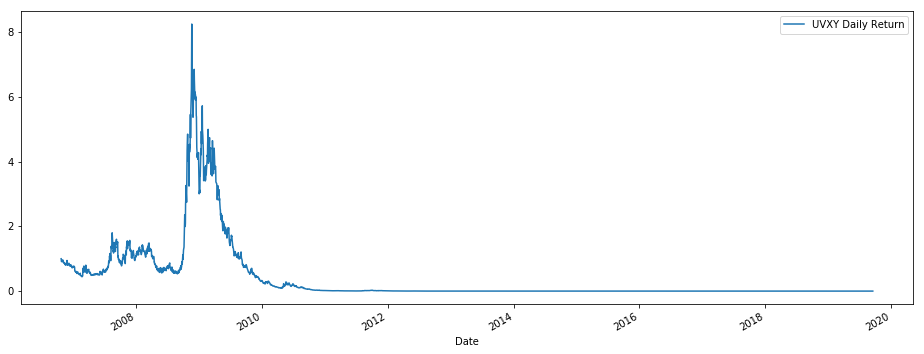

In [98]:
filtered_Data["UVXY Daily Return"].plot(figsize = (16,6), label = "UVXY Daily Return")
plt.legend();

### what was the day with the highest return

In [36]:
filtered_Data["UVXY Daily Return"].max()

8.245409811186573

In [37]:
filtered_Data["UVXY Daily Return"].idxmax()

Timestamp('2008-11-20 00:00:00')

In [38]:
filtered_Data.loc["2008-11-20"]

UVXY                  6.907237e+10
SPY                   7.545000e+01
VXXBEN               -2.517500e+01
VIX                   8.086000e+01
UX1                   6.623000e+01
UX2                   5.977000e+01
UX3                   5.467000e+01
UX4                   5.058000e+01
Day OF Week           4.000000e+00
UVXY Daily Changes    1.057043e-01
UVXY Daily Return     8.245410e+00
Name: 2008-11-20 00:00:00, dtype: float64

_______

## We will analyze VIX

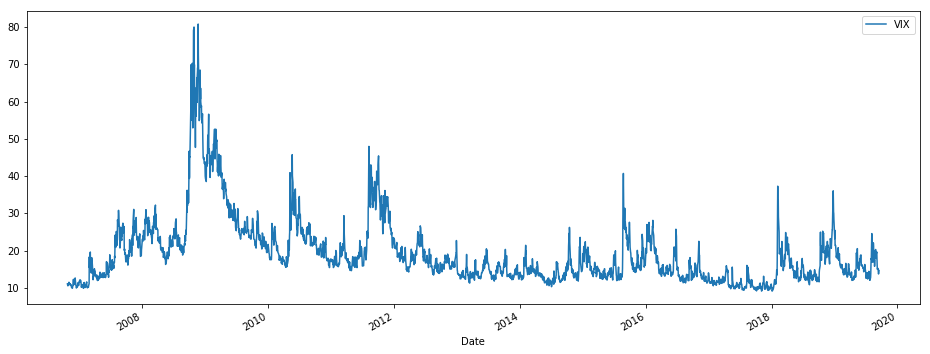

In [39]:
filtered_Data["VIX"].plot(figsize = (16,6), label = "VIX")
plt.legend()

### We will calculate  VIX daily Changes

In [40]:
filtered_Data["VIX Daily Changes"] = filtered_Data["VIX"].pct_change()

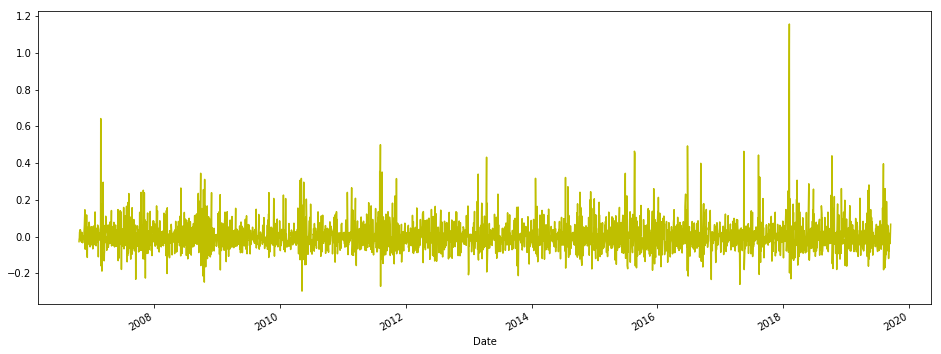

In [41]:
filtered_Data["VIX Daily Changes"].plot(figsize = (16,6), color = "y")

### Hmm seems to be the the most significant change in ViX my have occurred around the same time at UVXY. lets check the date and see if it matches 

In [42]:
filtered_Data["VIX Daily Changes"].max()

1.1559792027729636

In [43]:
filtered_Data["VIX Daily Changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [44]:
filtered_Data.loc["2018-02-05"]

UVXY                  1.143500e+02
SPY                   2.639300e+02
VXXBEN               -8.767500e+00
VIX                   3.732000e+01
UX1                   3.322500e+01
UX2                   2.797500e+01
UX3                   2.472500e+01
UX4                   2.095000e+01
Day OF Week           1.000000e+00
UVXY Daily Changes    6.620640e-01
UVXY Daily Return     1.365036e-08
VIX Daily Changes     1.155979e+00
Name: 2018-02-05 00:00:00, dtype: float64

### We will calculate the daily returns for vix

In [45]:
filtered_Data["VIX Daily Returns"] = (1 + filtered_Data["VIX Daily Changes"]).cumprod()

In [46]:
filtered_Data.tail()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day OF Week,UVXY Daily Changes,UVXY Daily Return,VIX Daily Changes,VIX Daily Returns
Date,,,,,,,,,,,,,
2019-09-10,27.30,298.13,2.2625,15.20,16.225,17.675,18.025,17.875,2,-0.004739,3.258896e-09,-0.004584,1.371841
2019-09-11,26.61,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3,-0.025275,3.176529e-09,-0.038816,1.318592
2019-09-12,25.65,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4,-0.036077,3.061930e-09,-0.026694,1.283394
2019-09-13,25.11,301.09,2.3025,13.74,14.475,16.875,17.575,17.625,5,-0.021053,2.997468e-09,-0.033755,1.240072
2019-09-16,25.65,300.16,1.2575,14.67,14.625,17.275,17.925,17.925,1,0.021505,3.061930e-09,0.067686,1.324007


### We plot vix daily returns

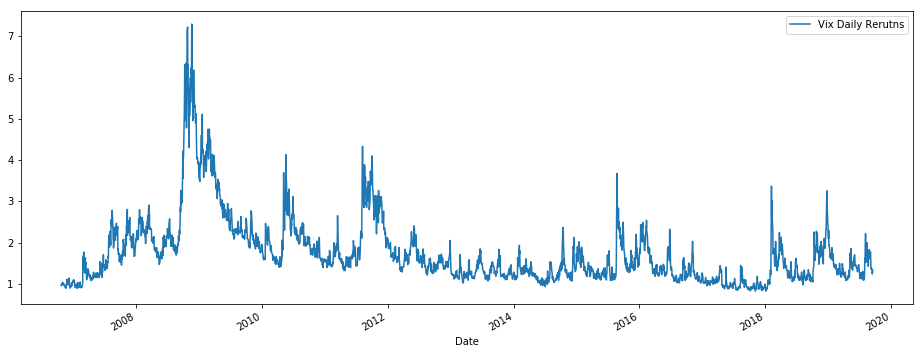

In [47]:
filtered_Data["VIX Daily Returns"].plot(figsize = (16,6), label = "Vix Daily Rerutns")
plt.legend();

___

# VXXBEN Analysis

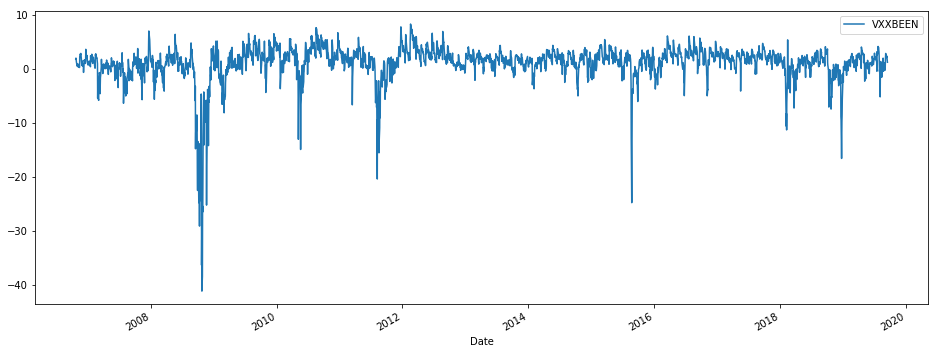

In [48]:
filtered_Data["VXXBEN"].plot(figsize = (16,6), label = "VXXBEEN")
plt.legend();

### there is a significant drop in  VXXBEN in the middle of 2008. This must be related to the market crash . What date was this and what was the max and max values of VXXBEN.

In [49]:
filtered_Data["VXXBEN"].astype(float).idxmin()

Timestamp('2008-10-24 00:00:00')

In [50]:
filtered_Data["VXXBEN"].astype(float).idxmax()

Timestamp('2012-02-17 00:00:00')

In [51]:
filtered_Data["VXXBEN"].max()

8.33

In [52]:
filtered_Data["VXXBEN"].min()

-41.09499999999999

In [53]:
filtered_Data.loc["2008-10-24"]

UVXY                  3.635303e+10
SPY                   8.704000e+01
VXXBEN               -4.109500e+01
VIX                   7.913000e+01
UX1                   5.582000e+01
UX2                   4.356000e+01
UX3                   4.069000e+01
UX4                   3.923000e+01
Day OF Week           5.000000e+00
UVXY Daily Changes    2.269418e-01
UVXY Daily Return     4.339589e+00
VIX Daily Changes     1.671091e-01
VIX Daily Returns     7.141697e+00
Name: 2008-10-24 00:00:00, dtype: float64

### Appears that when VXXBEN was at its lowest value of -41.1 UVXY dropped 22% and vix dropped 16% and vix was at 79.13 

_____

In [54]:
filtered_Data.loc["2012-02-17"]

UVXY                  3.959999e+07
SPY                   1.364100e+02
VXXBEN                8.330000e+00
VIX                   1.778000e+01
UX1                   2.260000e+01
UX2                   2.480000e+01
UX3                   2.575000e+01
UX4                   2.685000e+01
Day OF Week           5.000000e+00
UVXY Daily Changes   -1.199454e-02
UVXY Daily Return     4.727189e-03
VIX Daily Changes    -7.492196e-02
VIX Daily Returns     1.604693e+00
Name: 2012-02-17 00:00:00, dtype: float64

### VXXBEN highest value was at 8.33 and at this point VIX was at 17.78. All returns were are significant lows the higher the value of VXXBEN. So we may have the ability to makethe assumption that the lower the value of VXXBEEN the greater the chances of a higher return. Lets next calculate the daily changed for the value of VXXBEN!

In [55]:
filtered_Data["VXXBEN daily"] = filtered_Data["VXXBEN"].pct_change()

In [56]:
filtered_Data["VXXBEN daily"].idxmax()

Timestamp('2007-11-06 00:00:00')

### Consult Jeff here!!!!!!!!!!

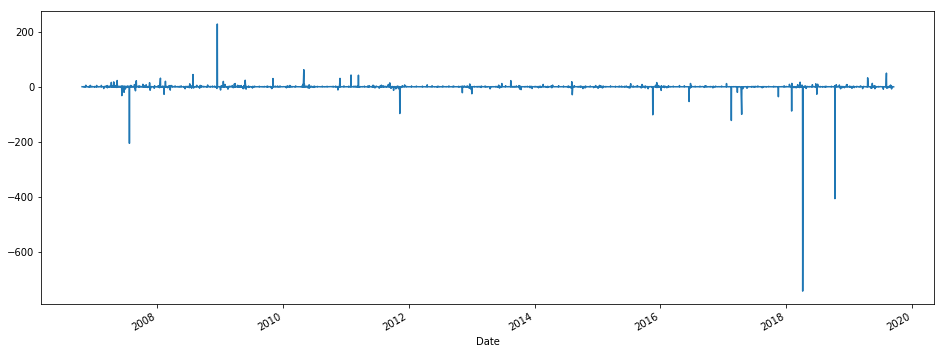

In [57]:
filtered_Data["VXXBEN daily"].plot(figsize = (16,6), label = "VXXBEN Daily Change")

In [58]:
filtered_Data.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day OF Week,UVXY Daily Changes,UVXY Daily Return,VIX Daily Changes,VIX Daily Returns,VXXBEN daily
Date,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.910,11.08,11.95,13.16,14.08,14.60,2,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,0.000000,1.000000,-0.027076,0.972924,0.060209
2006-10-25,7.968986e+09,138.35,1.760,10.66,11.49,12.52,13.79,14.52,4,-0.048714,0.951286,-0.011132,0.962094,-0.130864
2006-10-26,7.618653e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,-0.043962,0.909465,-0.009381,0.953069,-0.139205
2006-10-27,7.695087e+09,137.91,1.240,10.80,11.31,12.26,13.46,14.24,6,0.010032,0.918589,0.022727,0.974729,-0.181518


In [59]:
filtered_Data["VXXBEN daily"].min()

-740.0

In [60]:
filtered_Data["VXXBEN daily"].idxmin()

Timestamp('2018-04-06 00:00:00')

In [61]:
filtered_Data.loc["2018-04-06"]

UVXY                  9.960000e+01
SPY                   2.597200e+02
VXXBEN               -1.847500e+00
VIX                   2.149000e+01
UX1                   2.062500e+01
UX2                   1.952500e+01
UX3                   1.922500e+01
UX4                   1.942500e+01
Day OF Week           5.000000e+00
UVXY Daily Changes    8.852459e-02
UVXY Daily Return     1.188960e-08
VIX Daily Changes     1.346357e-01
VIX Daily Returns     1.939531e+00
VXXBEN daily         -7.400000e+02
Name: 2018-04-06 00:00:00, dtype: float64

### Lets check the days before

In [62]:
filtered_Data.loc["2018-04-03":"2018-04-06"]

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day OF Week,UVXY Daily Changes,UVXY Daily Return,VIX Daily Changes,VIX Daily Returns,VXXBEN daily
Date,,,,,,,,,,,,,,
2018-04-03,99.25,260.77,-1.3375,21.10,20.475,19.675,19.175,19.325,2,-0.062795,1.184782e-08,-0.106689,1.904332,-0.664997
2018-04-04,96.65,263.56,-0.5025,20.06,19.975,19.225,18.875,19.025,3,-0.026196,1.153745e-08,-0.049289,1.810469,-0.624299
2018-04-05,91.50,265.64,0.0025,18.94,19.075,18.675,18.525,18.775,4,-0.053285,1.092267e-08,-0.055833,1.709386,-1.004975
2018-04-06,99.60,259.72,-1.8475,21.49,20.625,19.525,19.225,19.425,5,0.088525,1.188960e-08,0.134636,1.939531,-740.000000


In [63]:
daily_changes = pd.concat([filtered_Data["VIX Daily Changes"].astype(float), filtered_Data["VXXBEN daily"].astype(float), filtered_Data["UVXY Daily Changes"].astype(float)], axis=1)

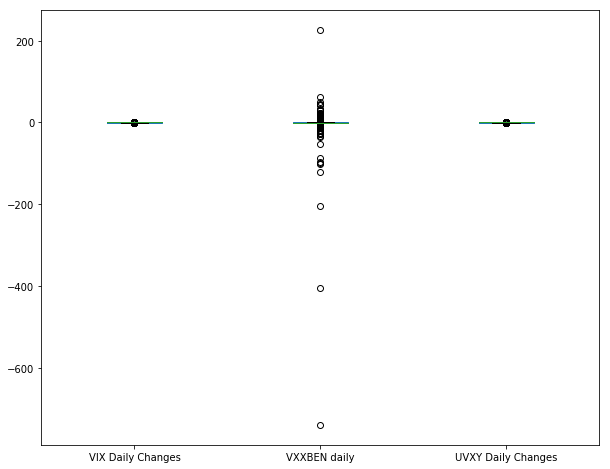

In [64]:
daily_changes.plot(kind = "box", figsize = (10,8))

____

# We will analyze SPY which will represent the S&P500 before dividends are paid 

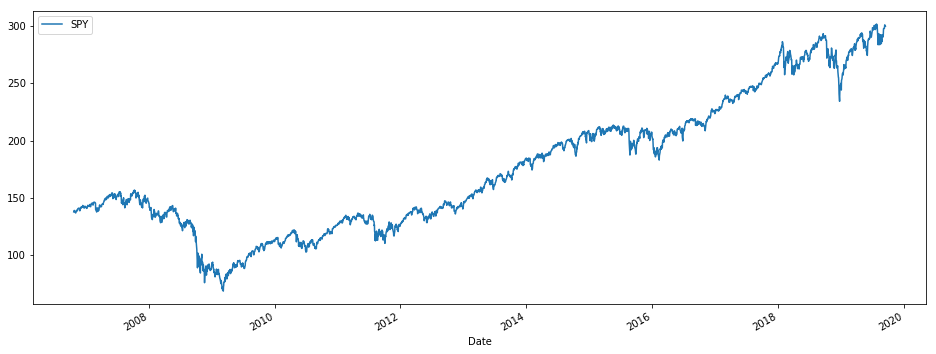

In [65]:
filtered_Data["SPY"].plot(figsize = (16,6), label = "SPY")
plt.legend();

### WE will inspect the lowest and highest values of SPY

### Lows 

In [66]:
filtered_Data["SPY"].min()

68.11

In [67]:
filtered_Data["SPY"].astype(float).idxmin()

Timestamp('2009-03-09 00:00:00')

In [68]:
filtered_Data.loc["2009-03-09"]

UVXY                  3.708983e+10
SPY                   6.811000e+01
VXXBEN               -5.020000e+00
VIX                   4.968000e+01
UX1                   4.705000e+01
UX2                   4.490000e+01
UX3                   4.180000e+01
UX4                   4.035000e+01
Day OF Week           1.000000e+00
UVXY Daily Changes    2.792011e-02
UVXY Daily Return     4.427543e+00
VIX Daily Changes     7.095074e-03
VIX Daily Returns     4.483755e+00
VXXBEN daily         -4.743833e-02
Name: 2009-03-09 00:00:00, dtype: float64

### Highs

In [69]:
filtered_Data["SPY"].max()

302.01

In [70]:
filtered_Data["SPY"].astype(float).idxmax()

Timestamp('2019-07-26 00:00:00')

In [71]:
filtered_Data.loc["2019-07-26"]

UVXY                  2.378000e+01
SPY                   3.020100e+02
VXXBEN                4.047500e+00
VIX                   1.216000e+01
UX1                   1.437500e+01
UX2                   1.582500e+01
UX3                   1.627500e+01
UX4                   1.647500e+01
Day OF Week           5.000000e+00
UVXY Daily Changes   -3.490260e-02
UVXY Daily Return     2.838702e-09
VIX Daily Changes    -4.552590e-02
VIX Daily Returns     1.097473e+00
VXXBEN daily          1.157822e-01
Name: 2019-07-26 00:00:00, dtype: float64

# daily changes in SPY

In [72]:
filtered_Data["SPY Daily Changes"] = filtered_Data["SPY"].pct_change()

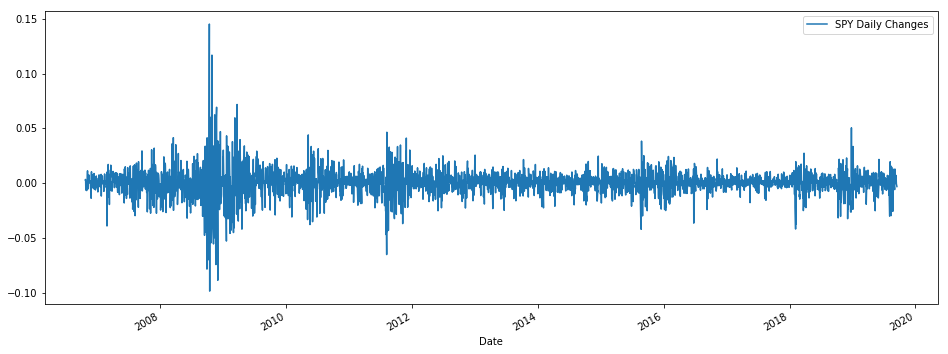

In [73]:
filtered_Data["SPY Daily Changes"].plot(figsize = (16,6), label = "SPY Daily Changes")
plt.legend();

### Daily Change Highs

In [74]:
filtered_Data["SPY Daily Changes"].max()

0.14519774011299424

In [75]:
filtered_Data["SPY Daily Changes"].idxmax()

Timestamp('2008-10-13 00:00:00')

In [76]:
filtered_Data.loc["2008-10-13"]

UVXY                  1.670382e+10
SPY                   1.013500e+02
VXXBEN               -1.381000e+01
VIX                   5.499000e+01
UX1                   5.064000e+01
UX2                   3.607000e+01
UX3                   3.178000e+01
UX4                   3.052000e+01
Day OF Week           1.000000e+00
UVXY Daily Changes   -1.523508e-01
UVXY Daily Return     1.993993e+00
VIX Daily Changes    -2.138670e-01
VIX Daily Returns     4.962996e+00
VXXBEN daily         -5.247763e-01
SPY Daily Changes     1.451977e-01
Name: 2008-10-13 00:00:00, dtype: float64

### Daily Change Mins

In [77]:
filtered_Data["SPY Daily Changes"].min()

-0.09844767150726086

In [78]:
filtered_Data["SPY Daily Changes"].idxmin()

Timestamp('2008-10-15 00:00:00')

In [79]:
filtered_Data.loc["2008-10-15"]

UVXY                  2.251538e+10
SPY                   9.002000e+01
VXXBEN               -2.434500e+01
VIX                   6.925000e+01
UX1                   5.818000e+01
UX2                   4.270000e+01
UX3                   3.555000e+01
UX4                   3.449000e+01
Day OF Week           3.000000e+00
UVXY Daily Changes    2.805914e-01
UVXY Daily Return     2.687740e+00
VIX Daily Changes     2.561219e-01
VIX Daily Returns     6.250000e+00
VXXBEN daily          6.589438e-01
SPY Daily Changes    -9.844767e-02
Name: 2008-10-15 00:00:00, dtype: float64

In [80]:
filtered_Data

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day OF Week,UVXY Daily Changes,UVXY Daily Return,VIX Daily Changes,VIX Daily Returns,VXXBEN daily,SPY Daily Changes
Date,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.9100,11.08,11.950,13.160,14.080,14.600,2,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.0250,10.78,11.780,12.830,14.030,14.470,3,0.000000,1.000000e+00,-0.027076,0.972924,0.060209,0.002982
2006-10-25,7.968986e+09,138.35,1.7600,10.66,11.490,12.520,13.790,14.520,4,-0.048714,9.512857e-01,-0.011132,0.962094,-0.130864,0.003409
2006-10-26,7.618653e+09,138.78,1.5150,10.56,11.250,12.210,13.460,14.180,5,-0.043962,9.094653e-01,-0.009381,0.953069,-0.139205,0.003108
2006-10-27,7.695087e+09,137.91,1.2400,10.80,11.310,12.260,13.460,14.240,6,0.010032,9.185894e-01,0.022727,0.974729,-0.181518,-0.006269
2006-10-30,7.754190e+09,137.81,0.7000,11.20,11.350,12.300,13.400,14.090,2,0.007681,9.256447e-01,0.037037,1.010830,-0.435484,-0.000725
2006-10-31,7.644418e+09,137.79,0.7400,11.10,11.310,12.160,13.230,13.990,3,-0.014156,9.125409e-01,-0.008929,1.001805,0.057143,-0.000145
2006-11-01,7.978771e+09,136.86,0.5000,11.51,11.550,12.430,13.220,13.940,4,0.043738,9.524537e-01,0.036937,1.038809,-0.324324,-0.006749
2006-11-02,8.084421e+09,136.78,0.7650,11.42,11.650,12.490,13.200,13.860,5,0.013241,9.650656e-01,-0.007819,1.030686,0.530000,-0.000585


In [81]:
dailyChangewoVXXBEN = pd.concat([filtered_Data["VIX Daily Changes"], filtered_Data["SPY Daily Changes"], filtered_Data["VXXBEN daily"],filtered_Data["UVXY Daily Changes"]], axis=1)

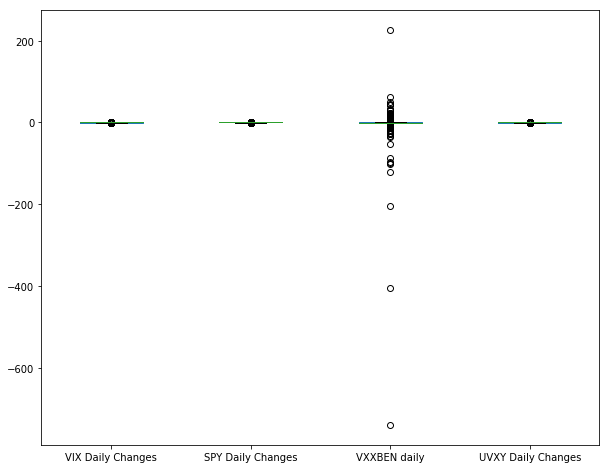

In [82]:
dailyChangewoVXXBEN.plot(kind = "box", figsize = (10,8))

/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2320: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

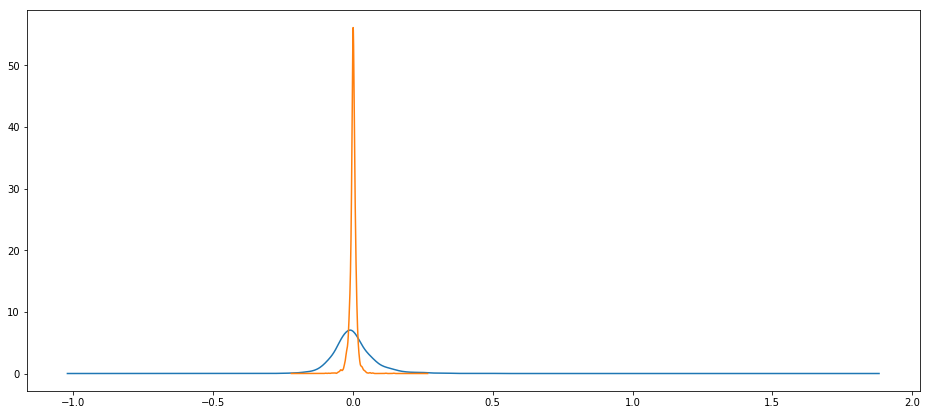

In [83]:
dailyChangewoVXXBEN.plot(kind = "kde", figsize = (16,7));

In [ ]:
dailyChangewoVXXBEN.hist(figsize = (16,8));

## 